# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Import dataset

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*10

,0
Age,1.986532
Fare,0.505051
Family,0.000000
Survived,0.000000


#Arbitrary using pandas

In [11]:
df['Age'].max()

80.0

In [12]:
df['Age_999'] = df['Age'].fillna(99)
df['Age_minusOne'] = df['Age'].fillna(-1)
df.head()

,Age,Fare,Family,Survived,Age_999,Age_minusOne
0,22.0,7.2500,1,0,22.0,22.0
1,38.0,71.2833,1,1,38.0,38.0
2,26.0,7.9250,0,1,26.0,26.0
3,35.0,53.1000,1,1,35.0,35.0
4,35.0,8.0500,0,0,35.0,35.0


In [17]:
df['Fare'].max(), df['Fare'].min()

(512.3292, 0.0)

In [18]:
df['Fare_999'] = df['Fare'].fillna(999)
df['Fare_minusOne'] = df['Fare'].fillna(-1)
df.head()

,Age,Fare,Family,Survived,Age_999,Age_minusOne,Fare_999,Fare_minusOne
0,22.0,7.2500,1,0,22.0,22.0,7.2500,7.2500
1,38.0,71.2833,1,1,38.0,38.0,71.2833,71.2833
2,26.0,7.9250,0,1,26.0,26.0,7.9250,7.9250
3,35.0,53.1000,1,1,35.0,35.0,53.1000,53.1000
4,35.0,8.0500,0,0,35.0,35.0,8.0500,8.0500


## Visulizations

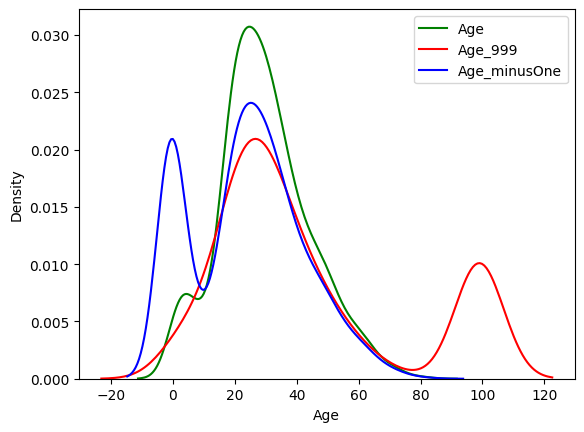

In [13]:
sns.kdeplot(df['Age'], color='green', label='Age')
sns.kdeplot(df['Age_999'], color='red', label='Age_999')
sns.kdeplot(df['Age_minusOne'], color='blue', label='Age_minusOne')

plt.legend()
plt.show()

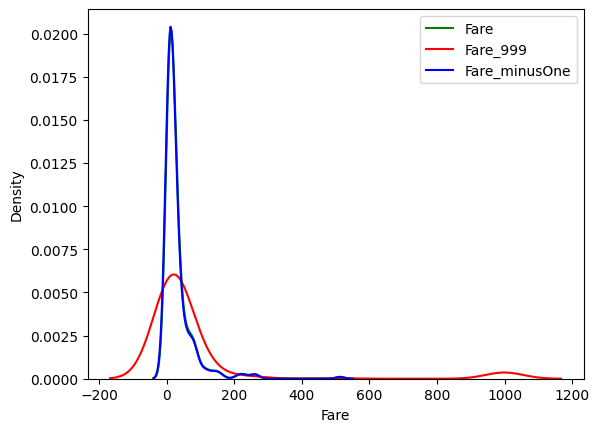

In [19]:
sns.kdeplot(df['Fare'], color='green', label='Fare')
sns.kdeplot(df['Fare_999'], color='red', label='Fare_999')
sns.kdeplot(df['Fare_minusOne'], color='blue', label='Fare_minusOne')

plt.legend()
plt.show()

## Find Co-Variance and Co-Relation

In [20]:
df.cov()

,Age,Fare,Family,Survived,Age_999,Age_minusOne,Fare_999,Fare_minusOne
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,102.518527,72.736744
Fare,78.071438,2530.673077,17.460363,6.442361,-73.833768,122.475966,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-7.402498,-4.243568,14.723310,16.641367
Survived,-0.551296,6.442361,0.013063,0.236772,-1.682796,0.108147,11.251402,5.939859
Age_999,211.019125,-73.833768,-7.402498,-1.682796,934.439778,-170.001251,-268.298084,-63.277655
Age_minusOne,211.019125,122.475966,-4.243568,0.108147,-170.001251,319.247427,237.363725,112.115172
Fare_999,102.518527,2530.673077,14.723310,11.251402,-268.298084,237.363725,47268.698672,858.207252
Fare_minusOne,72.736744,2530.673077,16.641367,5.939859,-63.277655,112.115172,858.207252,2455.887436


In [21]:
df.corr()

,Age,Fare,Family,Survived,Age_999,Age_minusOne,Fare_999,Fare_minusOne
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.031311,0.094827
Fare,0.099481,1.000000,0.212626,0.263920,-0.047700,0.135581,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.150088,-0.147201,0.041972,0.208126
Survived,-0.077221,0.263920,0.016639,1.000000,-0.113133,0.012439,0.106354,0.246324
Age_999,1.000000,-0.047700,-0.150088,-0.113133,1.000000,-0.311252,-0.040370,-0.041771
Age_minusOne,1.000000,0.135581,-0.147201,0.012439,-0.311252,1.000000,0.061103,0.126618
Fare_999,0.031311,1.000000,0.041972,0.106354,-0.040370,0.061103,1.000000,0.079653
Fare_minusOne,0.094827,1.000000,0.208126,0.246324,-0.041771,0.126618,0.079653,1.000000


## Check variance

In [26]:
print('Variance of Age is: ', df['Age'].var())
print('Variance of Age_999 is: ', df['Age_999'].var())
print('Variance of Age_minusOne is: ', df['Age_minusOne'].var())

Variance of Age is:  211.0191247463081
Variance of Age_999 is:  934.4397775893746
Variance of Age_minusOne is:  319.24742711837445


In [27]:
print('Variance of Fare is: ', df['Fare'].var())
print('Variance of Fare_999 is: ', df['Fare_999'].var())
print('Variance of Fare_minusOne is: ', df['Fare_minusOne'].var())

Variance of Fare is:  2530.6730768999487
Variance of Fare_999 is:  47268.69867189274
Variance of Fare_minusOne is:  2455.887435937784


# Arbitrary using `sklearn`

## Train test split

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,Age,Fare,Family,Age_999,Age_minusOne
331,45.5,28.5000,0,45.5,45.5
733,23.0,13.0000,0,23.0,23.0
382,32.0,7.9250,0,32.0,32.0
704,26.0,7.8542,1,26.0,26.0
813,6.0,31.2750,6,6.0,6.0
...,...,...,...,...,...
106,21.0,7.6500,0,21.0,21.0
270,NaN,31.0000,0,999.0,-1.0
860,41.0,NaN,2,41.0,41.0
435,14.0,120.0000,3,14.0,14.0


## SimpleInputer

In [28]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [29]:
trf1 = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [30]:
trf1.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [31]:
trf1.named_transformers_['imputer1'].statistics_

array([99.])

In [32]:
trf1.named_transformers_['imputer2'].statistics_

array([999.])

## Transform Data

In [33]:
X_train_trf = trf1.transform(X_train)
X_test_trf = trf1.transform(X_test)

# New DataFrame construct

In [35]:
X_train.columns

Index(['Age', 'Fare', 'Family', 'Age_999', 'Age_minusOne'], dtype='object')

In [36]:
new_df = pd.DataFrame(X_train_trf, columns=['Age', 'Age_99', 'Fare', 'Fare_999', 'Family'])
new_df.head()

,Age,Age_99,Fare,Fare_999,Family
0,45.5,28.5000,0.0,45.5,45.5
1,23.0,13.0000,0.0,23.0,23.0
2,32.0,7.9250,0.0,32.0,32.0
3,26.0,7.8542,1.0,26.0,26.0
4,6.0,31.2750,6.0,6.0,6.0
